# Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as proportion
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import normaltest
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_ind, ttest_rel, f_oneway, kstest, shapiro, wilcoxon
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import kruskal

%matplotlib inline

# Load and Group data - Class

In [2]:
class LoaderGrouper:

    def __init__(self, filename):
        self.filename = filename

    def load_rename_data (self):
        rename_list = {"Unnamed: 0_level_0Unnamed: 0_level_1":"soundID","Emotionratingmean":"emotionrating",
                    "Emotionmax":"emotion","datetimemax":"datetime","Soundgroupmax":"soundgroup"} 
        drop_list = ['heart_ratestd','skin_tempstd','est_02_variationstd','est_02_variationmean'] #dropped spo2 temp
        df = pd.read_csv(self.filename, header=[0,1])
        df.columns = [''.join(col) for col in df.columns]
        df.rename(columns = rename_list, inplace=True)
        df.drop([0], axis = 0, inplace=True) #drop first row cos its empty
        df.drop(drop_list, axis=1, inplace=True)
        # df.dropna(axis=0, inplace=True)
        # print("Missing Values\n", df.isnull().sum())
        return df

    def split_data(self):
        df = self.load_rename_data()

        #divides data based on emotion experienced
        df_fear  = df[(df.emotion == "Fear")]
        df_sadness = df[(df.emotion == "Sadness")]
        df_happiness = df[(df.emotion == "Happiness")]

        df_animal = df[df.soundgroup == "Animal"]
        df_nature = df[(df.soundgroup == "Nature")]
        df_transport = df[(df.soundgroup == "Transport")]
        df_people = df[(df.soundgroup == "People")]

        return df_fear, df_sadness, df_happiness, df_animal, df_nature, df_transport, df_people

    def create_list_name(self):

            data_frames = self.split_data()
            df_list = [df for df in data_frames]
            df_namelist = []
            for df in df_list:
                if (df.emotion.values == "Fear").all(): 
                    df_namelist.append("fear")
                elif(df.emotion.values=="Sadness").all(): 
                    df_namelist.append("sadness")
                elif(df.emotion.values=="Happiness").all():
                    df_namelist.append("happiness")
                elif (df.soundgroup.values=="Animal").all(): 
                    df_namelist.append("animal")
                elif (df.soundgroup.values=="Nature").all(): 
                    df_namelist.append("nature")
                elif (df.soundgroup.values=="People").all(): 
                    df_namelist.append("people")
                else:
                    df_namelist.append('transport')
            return df_list, df_namelist

    def create_emotion_df(self):
        df = self.load_rename_data()
        df_fear  = df[(df.emotion == "Fear")]
        df_sadness = df[(df.emotion == "Sadness")]
        df_happiness = df[(df.emotion == "Happiness")]
        return df_fear,df_sadness,df_happiness

    def create_soundgrp_df(self):
        df = self.load_rename_data()
        df_animal = df[df.soundgroup == "Animal"]
        df_nature = df[(df.soundgroup == "Nature")]
        df_transport = df[(df.soundgroup == "Transport")]
        df_people = df[(df.soundgroup == "People")]
        return df_animal, df_nature,df_transport,df_people



# Visualize Descriptive Statistics

In [3]:
class Visualizer(LoaderGrouper):

    def __init__(self, filename):
        super().__init__(filename)
    
    def visualize_boxplot(self):
        dfs = self.load_rename_data()
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
        sns.boxplot(ax=axes[0], data=dfs, x='emotion', y='heart_ratemean')
        sns.boxplot(ax=axes[1], data=dfs, x='soundgroup', y='heart_ratemean')
        plt.show()
        
    def visualize_histplot(self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            #need to pull title for all plots
            sns.histplot(data=df, x="heart_ratemean", kde=True )
            plt.title(f'{name}')
            plt.show()

    def visualize_qqplot(self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            qqplot(df.heart_ratemean, line= "s")
            plt.title(f'{name}')
            plt.show()    

Instance

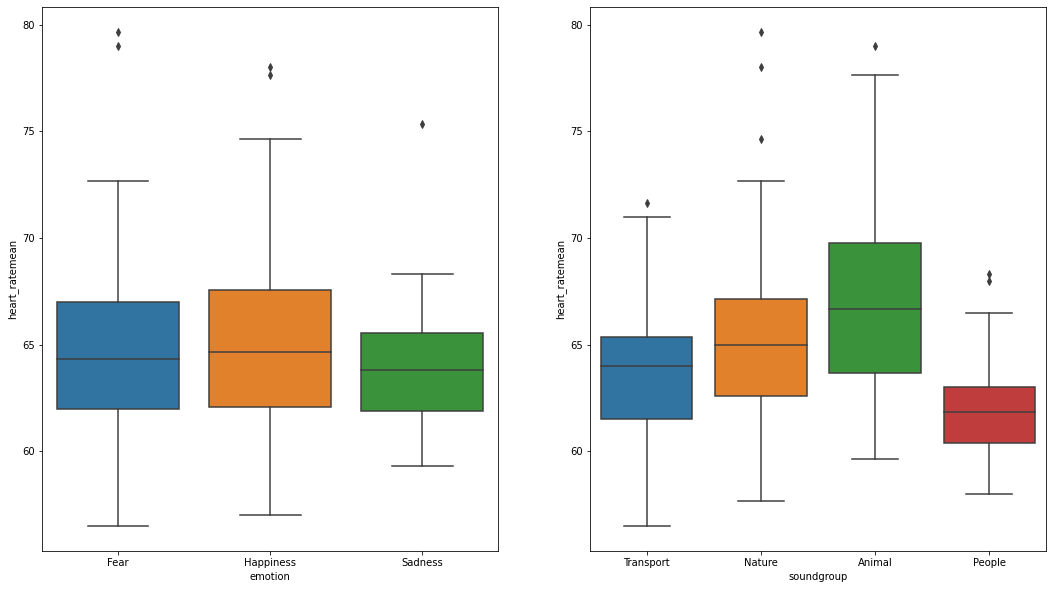

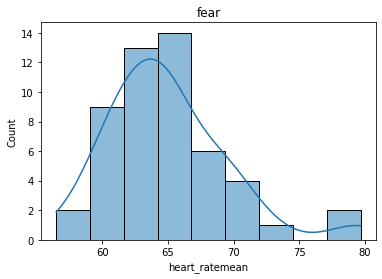

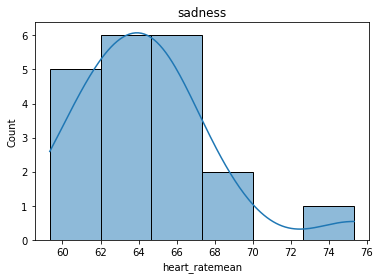

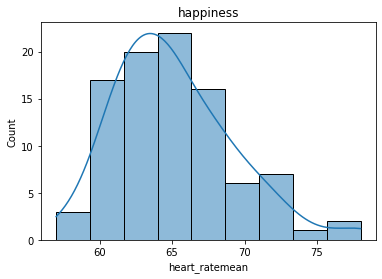

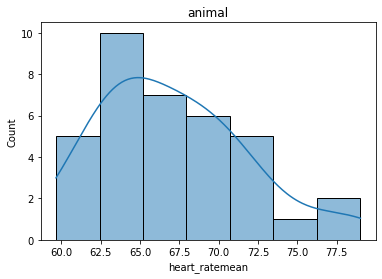

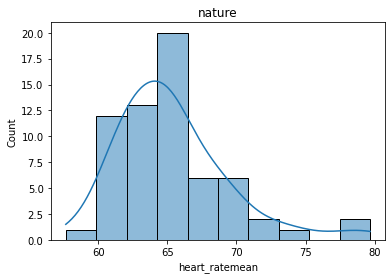

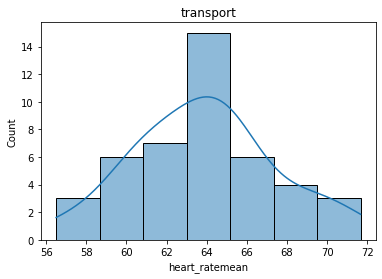

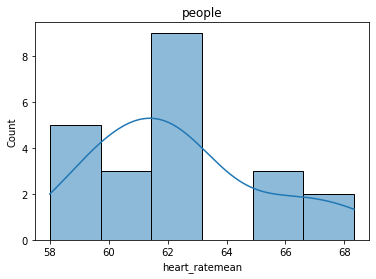

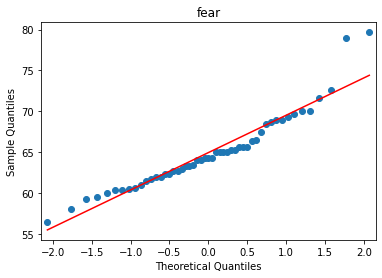

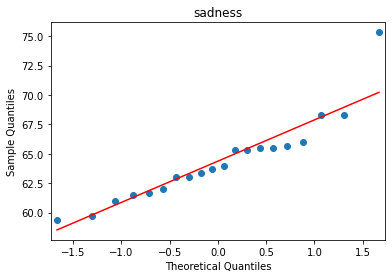

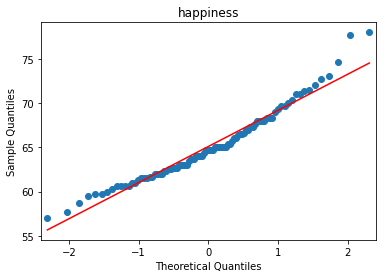

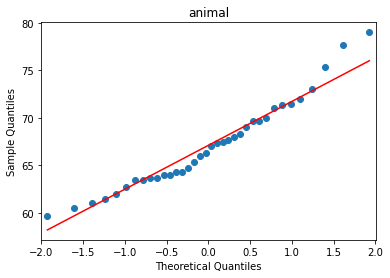

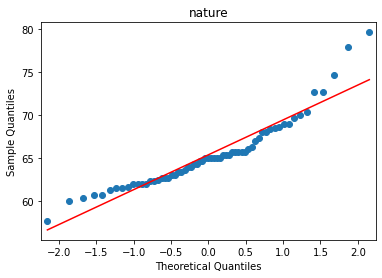

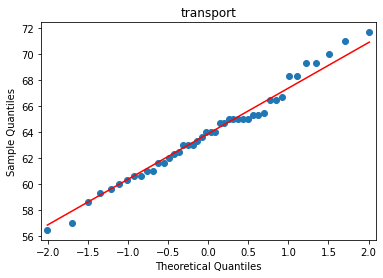

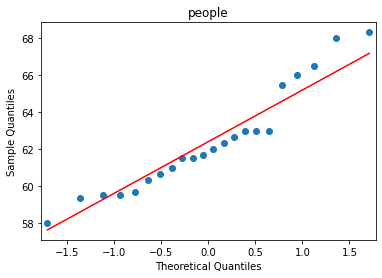

In [4]:
df = Visualizer('Extracted data 2/df_combinedined_user002_exp001.csv')
df.visualize_boxplot()
df.visualize_histplot()
df.visualize_qqplot()

# Normality Test - Subclass

In [6]:
class Normal(LoaderGrouper):
    
    def __init__(self, filename, col_name):
        super().__init__(filename)
        self.col_name = col_name

    def shapiro_test (self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            print(name)
            stat, p_val = shapiro(df[self.col_name])
            print('Statistics=%.3f, p=%.3f' % (stat, p_val))
            # interpret
            alpha = 0.05
            if p_val > alpha:
                print('Sample looks Gaussian - fail to reject H0')
                print(f'\n')
            else:
                print('Sample does not look Gaussian - reject H0')
                print(f'\n')
    def normal_test(self):
        dfs,names = self.create_list_name()
        for df,name in zip(dfs,names):
            stat, p_val = normaltest(df[self.col_name])
            print('stat=%.3f, p=%.3f' % (stat, p_val))
            if p_val > 0.05:
                print(f'\n{name}\n','Sample looks Gaussian - fail to reject H0')
            else:
                print(f'\n{name}\n','Sample does not look Gaussian - reject H0')

    

Instance

In [7]:
df = Normal('Extracted data 2/df_combinedined_user002_exp001.csv','heart_ratemean')
df.shapiro_test()


fear
Statistics=0.927, p=0.004
Sample does not look Gaussian - reject H0


sadness
Statistics=0.894, p=0.032
Sample does not look Gaussian - reject H0


happiness
Statistics=0.960, p=0.006
Sample does not look Gaussian - reject H0


animal
Statistics=0.956, p=0.164
Sample looks Gaussian - fail to reject H0


nature
Statistics=0.906, p=0.000
Sample does not look Gaussian - reject H0


transport
Statistics=0.984, p=0.780
Sample looks Gaussian - fail to reject H0


people
Statistics=0.928, p=0.114
Sample looks Gaussian - fail to reject H0




In [8]:
df = Normal('Extracted data 2/df_combinedined_user002_exp001.csv','skin_tempmean')
df.shapiro_test()

fear
Statistics=0.884, p=0.000
Sample does not look Gaussian - reject H0


sadness
Statistics=0.767, p=0.000
Sample does not look Gaussian - reject H0


happiness
Statistics=0.872, p=0.000
Sample does not look Gaussian - reject H0


animal
Statistics=0.792, p=0.000
Sample does not look Gaussian - reject H0


nature
Statistics=0.921, p=0.001
Sample does not look Gaussian - reject H0


transport
Statistics=0.919, p=0.005
Sample does not look Gaussian - reject H0


people
Statistics=0.847, p=0.003
Sample does not look Gaussian - reject H0




# Non-Parametric Test - Kruskal One-way ANOVA

In [9]:

class NonParametricTests(LoaderGrouper):
    
    def __init__(self, filename, col_name):
        super().__init__(filename)
        self.col_name = col_name

    def kruskal_emotion(self):
        df_fear,df_sadness,df_happiness = self.create_emotion_df()

        stat, p = kruskal(df_fear[self.col_name], df_sadness[self.col_name], df_happiness[self.col_name] )
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)') 

    def kruskal_sdgrp(self):
        df_animal, df_nature,df_transport,df_people = self.create_soundgrp_df()

        stat, p = kruskal(df_animal[self.col_name], df_nature[self.col_name], df_transport[self.col_name], df_people[self.col_name])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Same distribution (fail to reject H0)')
        else:
            print('Different distribution (reject H0)') 
 



In [10]:
df = NonParametricTests("Extracted data 2/df_combinedined_user002_exp001.csv",'heart_ratemean')
df.kruskal_emotion()
print('Sound Group;')
df.kruskal_sdgrp()

Statistics=0.393, p=0.822
Same distribution (fail to reject H0)
Sound Group;
Statistics=20.448, p=0.000
Different distribution (reject H0)


In [11]:
df = NonParametricTests("Extracted data 2/df_combinedined_user002_exp001.csv",'skin_tempmean')
df.kruskal_emotion()
print('Sound Group;')
df.kruskal_sdgrp()

Statistics=5.097, p=0.078
Same distribution (fail to reject H0)
Sound Group;
Statistics=127.800, p=0.000
Different distribution (reject H0)
